#### Configuration

In [1]:
from itertools import compress
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as st
import tqdm

#### Define Functions

In [2]:
def calculate_sample_error(prob_a, sample_a, prob_b, sample_b):
    """
    For given unequal proportions of two populations for which some condition is true,
    estimate the likelihood that samples of the two populations would lead you to the incorrect conclusion.
    
    Example:
    
        In village A, 52% <prob_a> of citizens wear hats. In village B, 47% <prob_b> of citizens wear hats.
        Estimate the likelihood that samples of 100 <sample_a> citizens from A and
        100 <sample_b> from B are taken, what is the likelihood that sample B would
        have a higher % of hat-wearers than sample A? (given sample_a and sample_b are large enough, random samples)
        
    Usage:
        Executing -> 'calculate_sample_error(0.52, 0.47, 100, 100)'
        Should return ->  0.23946
    """
    # Maximum and minimum probabilities
    prob_list = [prob_a, prob_b]
    sample_list = [sample_a, sample_b]
    max_prob, min_prob = max(prob_list), min(prob_list)
    
    # Samples associated with minimum and maximum probabilities
    max_sample = list(compress(sample_list, [p == max_prob for p in prob_list]))[0]
    min_sample = list(compress(sample_list, [p == min_prob for p in prob_list]))[0]
    
    # Estimate likelihood
    mean_diff = max_prob - min_prob
    stdev_diff = np.sqrt(((max_prob * (1 - max_prob)) / max_sample) + ((min_prob * (1 - min_prob)) / min_sample))
    z_score = (0 - mean_diff) / stdev_diff
    return st.norm.cdf(z_score)

#### Execute Functions

##### Question 1
In village A, 53.5% of citizens walk to work vs. village B where 48.5% of citizens walk to work. (true population probabilities)

If you polled a random sample of 250 people from village A and 130 people from village B on whether or not they walk to work, what is the likelihood that your polling group from village B would have a higher percentage of walkers than village A?

- estimate using the function 

In [3]:
calculate_sample_error(.535, 250, .485, 130)

0.17726064399873104

- estimate by running simulations (will differ slightly due to randomness)

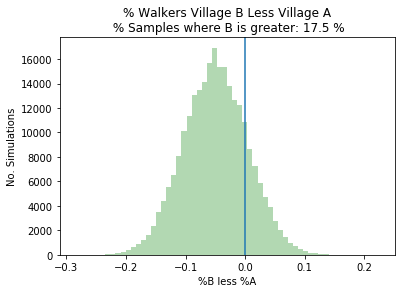

In [4]:
# Configuration
a_walkers = 0.535
b_walkers = 0.485
a_sample = 250
b_sample = 130
n_people_per_village = 10000
n_simulations = 250000

# Create list of 'yes' and 'no' responses given the known population values
village_a_no = ['yes'] * int(a_walkers * n_people_per_village)
village_a_yes = ['no'] * int(n_people_per_village - int(a_walkers * n_people_per_village))
village_a = village_a_no + village_a_yes
random.shuffle(village_a)

village_b_no = ['yes'] * int(b_walkers * n_people_per_village)
village_b_yes = ['no'] * int(n_people_per_village - int(b_walkers * n_people_per_village))
village_b = village_b_no + village_b_yes
random.shuffle(village_b)

# Use a loop to simulate repeated sampling/polling
b_less_a = []
b_greater_a = []

for i in tqdm.tqdm_notebook(range(n_simulations)):
    
    # Shuffle and sample villages a & b
    sample_a = random.sample(village_a, a_sample)
    sample_b = random.sample(village_b, b_sample)
    
    # Calculate % frequencies of walkers in each sample 
    yes_a = np.mean([1 if x == 'yes' else 0 for x in sample_a])
    yes_b = np.mean([1 if x == 'yes' else 0 for x in sample_b])
    b_less_a.append(yes_b - yes_a)
    b_greater_a.append(yes_b > yes_a)

    
perc_lab = str(np.round(np.mean(b_greater_a) * 100,2))
    
plt.hist(b_less_a, facecolor='green', alpha=0.3, bins = 60)
plt.axvline(x=0)
plt.title('% Walkers Village B Less Village A\n % Samples where B is greater: {} %'.format(perc_lab))
plt.ylabel('No. Simulations')
plt.xlabel('%B less %A')
plt.show()

##### Question 2
Answer the same question, but assuming:

In village A, 60% of citizens walk to work vs. village B where 49% of citizens walk to work. You poll 100 people in each village.

- estimate using the function

In [5]:
calculate_sample_error(.60, 100, .49, 100)

0.058022955871784604

- estimate by running simulations (will differ slightly due to randomness)

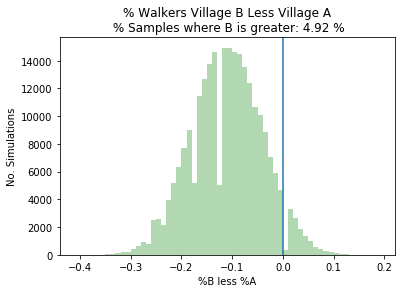

In [6]:
# Configuration
a_walkers = 0.60
b_walkers = 0.49
a_sample = 100
b_sample = 100
n_people_per_village = 10000
n_simulations = 250000

# Create list of 'yes' and 'no' responses given the known population values
village_a_no = ['yes'] * int(a_walkers * n_people_per_village)
village_a_yes = ['no'] * int(n_people_per_village - int(a_walkers * n_people_per_village))
village_a = village_a_no + village_a_yes
random.shuffle(village_a)

village_b_no = ['yes'] * int(b_walkers * n_people_per_village)
village_b_yes = ['no'] * int(n_people_per_village - int(b_walkers * n_people_per_village))
village_b = village_b_no + village_b_yes
random.shuffle(village_b)

# Use a loop to simulate repeated sampling/polling
b_less_a = []
b_greater_a = []

for i in tqdm.tqdm_notebook(range(n_simulations)):
    
    # Shuffle and sample villages a & b
    sample_a = random.sample(village_a, a_sample)
    sample_b = random.sample(village_b, b_sample)
    
    # Calculate % frequencies of walkers in each sample 
    yes_a = np.mean([1 if x == 'yes' else 0 for x in sample_a])
    yes_b = np.mean([1 if x == 'yes' else 0 for x in sample_b])
    b_less_a.append(yes_b - yes_a)
    b_greater_a.append(yes_b > yes_a)

    
perc_lab = str(np.round(np.mean(b_greater_a) * 100,2))
    
plt.hist(b_less_a, facecolor='green', alpha=0.3, bins = 60)
plt.axvline(x=0)
plt.title('% Walkers Village B Less Village A\n % Samples where B is greater: {} %'.format(perc_lab))
plt.ylabel('No. Simulations')
plt.xlabel('%B less %A')
plt.show()